In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_excel("API_19_DS2_en_excel_v2_3470839.xls") 

In [2]:
df.shape

(20219, 65)

In [3]:
df.head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,Last Updated Date,2021-12-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.000,1961.000,1962.000,1963.00,1964.000,1965.0,...,2011.00,2012.000,2013.00,2014.000,2015.000,2016.000,2017.000,2018.000,2019.000,2020.000
3,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776,50.761,50.746,50.73,50.715,50.7,...,42.94,42.957,42.99,43.041,43.108,43.192,43.293,43.411,43.546,43.697
4,Aruba,ABW,Urban population,SP.URB.TOTL,27525.000,28139.000,28537.000,28763.00,28922.000,29080.0,...,43820.00,44059.000,44351.00,44666.000,44978.000,45293.000,45614.000,45949.000,46294.000,46654.000


In [4]:
# remove the first 2 rows as they are useless
df = df.iloc[2:]

In [5]:
# make the first row as the column index

new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

In [6]:
df.head(2)

2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
3,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776,50.761,50.746,50.73,50.715,50.7,...,42.94,42.957,42.99,43.041,43.108,43.192,43.293,43.411,43.546,43.697
4,Aruba,ABW,Urban population,SP.URB.TOTL,27525.000,28139.000,28537.000,28763.00,28922.000,29080.0,...,43820.00,44059.000,44351.00,44666.000,44978.000,45293.000,45614.000,45949.000,46294.000,46654.000


In [7]:
# remove rows with more than 51 columns as nan
df = df[df.isnull().sum(axis=1) < 51]

# check if the number of rows changed
df.shape

(12090, 65)

In [8]:
#Selecting India
india = df[df['Country Name']=='India']


# select only the row that contains data about the urban population
india_pop = india[india['Indicator Name']=='Urban population']

In [9]:
# set the index
india_pop.reset_index(inplace=True,drop=True)
india_pop.set_index('Country Name',inplace=True)
india_pop

2,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
Country Name,,,,,,,,,,,,,,,,,,,,,
India,IND,Urban population,SP.URB.TOTL,80756165.0,82882675.0,85456483.0,88127852.0,90901311.0,93760317.0,96712771.0,...,391040056.0,400416922.0,409907903.0,419567353.0,429428650.0,439501314.0,449795398.0,460304169.0,471031529.0,481980332.0


In [10]:
# remove the first 3 column values:
pop = india_pop.iloc[:,3:]
pop

2,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
Country Name,,,,,,,,,,,,,,,,,,,,,
India,80756165.0,82882675.0,85456483.0,88127852.0,90901311.0,93760317.0,96712771.0,99765995.0,102932969.0,106238157.0,...,391040056.0,400416922.0,409907903.0,419567353.0,429428650.0,439501314.0,449795398.0,460304169.0,471031529.0,481980332.0


In [11]:
# years
x = pop.columns

# population values for India
y1 = pop.values
y1 = y1[0]

In [12]:
# do the above tasks for China as well
china = df[df['Country Name']=='China']
china_pop = china[china['Indicator Name']=='Urban population']
china_pop.reset_index(inplace=True,drop=True)
china_pop.set_index('Country Name',inplace=True)
pop = china_pop.iloc[:,3:]
pop

2,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
Country Name,,,,,,,,,,,,,,,,,,,,,
China,108085352.0,110327936.0,114685540.0,121162226.0,127791981.0,129348359.0,131746910.0,134196718.0,136747486.0,139527262.0,...,679390629.0,700996454.0,722694421.0,744357517.0,765822300.0,787376534.0,809246214.0,829760595.0,848982855.0,866705688.0


In [13]:
# population of china
y2 = pop.values
y2 = y2[0]

In [ ]:
#Task 1

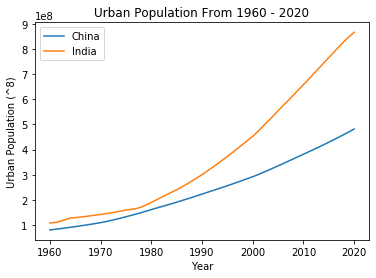

In [14]:
plt.plot(x,y1,label='China')
plt.plot(x,y2,label='India')

plt.legend()

plt.xlabel('Year')
plt.ylabel('Urban Population (^8)')

plt.title('Urban Population From 1960 - 2020')

plt.show()

In [15]:
#Selecting United States
us = df[df['Country Name']=='United States']

# select only the row that contains data about the urban population
us_pop = us[us['Indicator Name']=='Urban population']
# set the index
us_pop.reset_index(inplace=True,drop=True)
us_pop.set_index('Country Name',inplace=True)
pop = us_pop.iloc[:,3:]
# population of china
y5 = pop.values
y5 = y5[0]
pop

2,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
Country Name,,,,,,,,,,,,,,,,,,,,,
United States,126462473.0,129276215.0,131988693.0,134615404.0,137215986.0,139663053.0,142008703.0,144288757.0,146463196.0,148629124.0,...,252208133.0,254614421.0,256953576.0,259430732.0,261950744.0,264473000.0,266788716.0,268844029.0,270737596.0,272364755.0


In [16]:
#Selecting Indonesia
indo = df[df['Country Name']== 'Indonesia']

# select only the row that contains data about the urban population
indo_pop = indo[indo['Indicator Name']=='Urban population']
# set the index
indo_pop.reset_index(inplace=True,drop=True)
indo_pop.set_index('Country Name',inplace=True)
pop = indo_pop.iloc[:,3:]
# population of china
y6 = pop.values
y6 = y6[0]
pop

2,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
Country Name,,,,,,,,,,,,,,,,,,,,,
Indonesia,12799370.0,13353483.0,13931417.0,14536390.0,15169459.0,15831168.0,16524248.0,17248678.0,18001990.0,18785497.0,...,124016434.0,127396101.0,130825451.0,134286663.0,137751866.0,141211677.0,144655573.0,148088731.0,151509724.0,154926514.0


In [17]:
#Selecting Pakistan
pak = df[df['Country Name']== 'Pakistan']

# select only the row that contains data about the urban population
pak_pop = pak[pak['Indicator Name']=='Urban population']
# set the index
pak_pop.reset_index(inplace=True,drop=True)
pak_pop.set_index('Country Name',inplace=True)
pop = pak_pop.iloc[:,3:]
# population of china
y7 = pop.values
y7 = y7[0]
pop

2,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
Country Name,,,,,,,,,,,,,,,,,,,,,
Pakistan,9944300.0,10365137.0,10738219.0,11130045.0,11541400.0,11971325.0,12421723.0,12892412.0,13383892.0,13895977.0,...,64539406.0,66312147.0,68113708.0,69956302.0,71845554.0,73783786.0,75765181.0,77815624.0,79927762.0,82094635.0


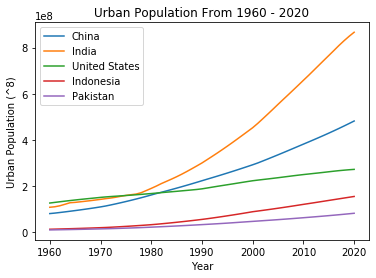

In [18]:
#Comparing the population growth of India with other populated countries in world
plt.plot(x,y1,label='China')
plt.plot(x,y2,label='India')
plt.plot(x,y5,label='United States')
plt.plot(x,y6,label='Indonesia')
plt.plot(x,y7,label='Pakistan')

plt.legend()

plt.xlabel('Year')
plt.ylabel('Urban Population (^8)')

plt.title('Urban Population From 1960 - 2020')

plt.show()

In [ ]:
#Task 2

In [19]:

# select row that shows CO2 emssions every year of India:
india_co2 = india[india['Indicator Name']=='CO2 emissions (kt)']

india_co2.reset_index(inplace=True,drop=True)
india_co2.set_index('Country Name',inplace=True)

co2 = india_co2.iloc[:,3:]
co2.head()

2,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
Country Name,,,,,,,,,,,,,,,,,,,,,
India,120581.961,130402.187,143467.708,154083.673,150647.694,165972.087,171765.947,172238.99,187336.029,190724.337,...,1760800.0,1908570.0,1966810.0,2136870.0,2150220.0,2183280.0,2301440.0,2434520.0,NaN,NaN


In [20]:
# co2 emissions (kt) in India
y3 = co2.values[0]

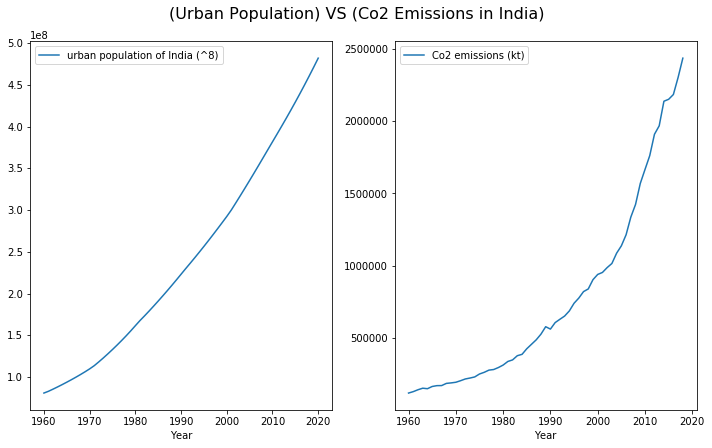

In [28]:
#Comparing Urban population with Co2 emissions in India
plt.figure(figsize=(10,6))


plt.subplot(1,2,1)
plt.plot(x,y1,label='urban population of India (^8)')
plt.xlabel('Year')
plt.legend(loc="upper left")

plt.subplot(1,2,2)
plt.plot(x,y3,label='Co2 emissions (kt)')
plt.xlabel('Year')
plt.legend(loc="upper left")


plt.suptitle('(Urban Population) VS (Co2 Emissions in India)',size=16, y=1.029)


plt.tight_layout()

plt.show()

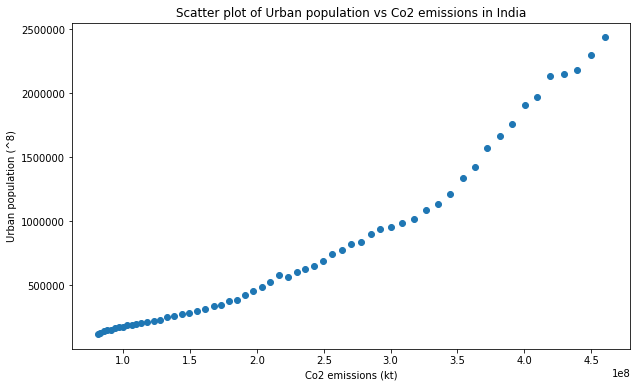

In [22]:
#scatterplot of Urban population and Co2 emissions in India
plt.figure(figsize=(10,6))


plt.scatter(y1, y3)
plt.xlabel('Co2 emissions (kt)')
plt.ylabel('Urban population (^8)')
plt.title('Scatter plot of Urban population vs Co2 emissions in India')


plt.show()

In [23]:
#pearsons correlation between urban population and Co2 emissions (kt) in India
from scipy.stats.stats import pearsonr      
pearsonr(y1[:-2],y3[:-2])[0]

0.9677124354105305

In [24]:
# select row that shows CO2 emssions every year of India:
china_co2 = china[china['Indicator Name']=='CO2 emissions (kt)']

china_co2.reset_index(inplace=True,drop=True)
china_co2.set_index('Country Name',inplace=True)

co2 = china_co2.iloc[:,3:]
co2.head()

2,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
Country Name,,,,,,,,,,,,,,,,,,,,,
China,780726.302,552066.85,440359.029,436695.696,436923.05,475972.933,522789.522,433234.048,468928.626,577237.138,...,9278250.0,9533210.0,9936680.0,9894940.0,9830430.0,9814310.0,10017770.0,10313460.0,NaN,NaN


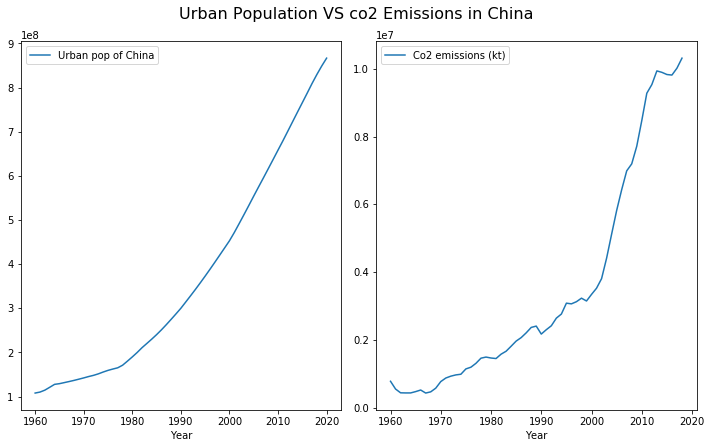

In [25]:
#Comparing Urban population with Co2 emissions in China
x4 = co2.columns
y4 = co2.values[0]

plt.figure(figsize=(10,6))
 
plt.subplot(1,2,1)
plt.plot(x,y2,label='Urban pop of China')
plt.xlabel('Year')
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(x,y4,label='Co2 emissions (kt)')
plt.xlabel('Year')
plt.legend(loc='upper left')

plt.suptitle('Urban Population VS co2 Emissions in China',size=16, y=1.029)

plt.tight_layout()

plt.show()

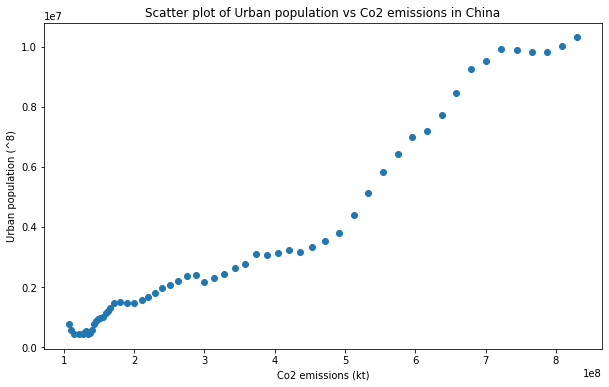

In [29]:
#scatterplot of Urban population and Co2 emissions in China
plt.figure(figsize=(10,6))

plt.scatter(y2, y4)
plt.xlabel('Co2 emissions (kt)')
plt.ylabel('Urban population (^8)')
plt.title('Scatter plot of Urban population vs Co2 emissions in China')


plt.show()

In [30]:
#pearsons correlation between urban population and Co2 emissions (kt) in China
pearsonr(y2[:-2],y4[:-2])[0]

0.9762891643527318